In [1]:
!pip show medmnist

Name: medmnist
Version: 3.0.2
Summary: [MedMNIST+] 18x Standardized Datasets for 2D and 3D Biomedical Image Classification with Multiple Size Options: 28 (MNIST-Like), 64, 128, and 224
Home-page: https://github.com/MedMNIST/MedMNIST/
Author: MedMNIST Team
Author-email: jiancheng.yang@epfl.ch
License: Apache-2.0 License
Location: C:\Users\radhe\AppData\Roaming\Python\Python311\site-packages
Requires: fire, numpy, pandas, Pillow, scikit-image, scikit-learn, torch, torchvision, tqdm
Required-by: 


In [2]:
from medmnist import OrganCMNIST
import numpy as np

In [3]:
# from sklearn.model_selection import cross_val_predict

In [4]:
import matplotlib.pyplot as plt
import time
# from sklearn.model_selection import GridSearchCV

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [7]:
from sklearn.metrics import precision_recall_curve

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, RocCurveDisplay

from sklearn.metrics import ConfusionMatrixDisplay

In [9]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("\n")
    
def confusion_matrix_plot(y_test, y_pred):
    plt.rc('font', size=9)  # extra code – make the text smaller
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.rc('font', size=10)  # extra code
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        normalize="true", values_format=".0%")
    plt.show()

In [10]:
# ROC Curve
def plot_roc_curve(y_test, y_prob, model_name):
    # Binarize the labels for ROC curve
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]
    
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc_score(y_test_bin[:, i], y_prob[:, i]):.2f})")
    
    plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()


In [11]:
from sklearn.linear_model import SGDClassifier

In [12]:
from sklearn.svm import SVC


In [13]:
from sklearn.linear_model import LogisticRegression


In [14]:
from sklearn.tree import DecisionTreeClassifier


In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
from sklearn.ensemble import VotingClassifier

In [17]:
from sklearn.ensemble import AdaBoostClassifier

In [18]:
from sklearn.ensemble import BaggingClassifier

In [19]:
# Load the coronal view dataset (OrganCMNIST)
train_dataset = OrganCMNIST(split='train', download=True)
val_dataset = OrganCMNIST(split='val', download=True)
test_dataset = OrganCMNIST(split='test', download=True)


# Convert images and labels to numpy arrays for easier handling
train_images = np.array([img[0] for img in train_dataset])  # Images are in 2D
train_labels = np.array([img[1] for img in train_dataset])

val_images = np.array([img[0] for img in val_dataset])
val_labels = np.array([img[1] for img in val_dataset])

test_images = np.array([img[0] for img in test_dataset])
test_labels = np.array([img[1] for img in test_dataset])

Using downloaded and verified file: C:\Users\radhe\.medmnist\organcmnist.npz
Using downloaded and verified file: C:\Users\radhe\.medmnist\organcmnist.npz
Using downloaded and verified file: C:\Users\radhe\.medmnist\organcmnist.npz


In [20]:
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
val_images.shape

Train images shape: (12975, 28, 28)
Train labels shape: (12975, 1)


(2392, 28, 28)

In [21]:
test_images.shape

(8216, 28, 28)

In [22]:
# Flatten the images
train_images_flat = train_images.reshape(len(train_images), -1)
val_images_flat = val_images.reshape(len(val_images), -1)
test_images_flat = test_images.reshape(len(test_images), -1)

In [23]:
train_labels_flat = train_labels.reshape(-1)
val_labels_flat = val_labels.reshape(-1)
test_labels_flat = test_labels.reshape(-1)

In [24]:
X_train = train_images_flat
y_train = train_labels_flat

X_val = val_images_flat
y_val = val_labels_flat

X_test = test_images_flat
y_test = test_labels_flat

In [25]:
# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler on the training data
scaler.fit(X_train)
# Transform the train, validation, and test sets
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [26]:
X_train_combined_sc = np.concatenate((X_train_scaled, X_val_scaled), axis=0)

In [27]:
y_train_combined = np.concatenate((y_train, y_val), axis=0)

In [28]:
X_train_combined_sc.shape, y_train_combined.shape

((15367, 784), (15367,))

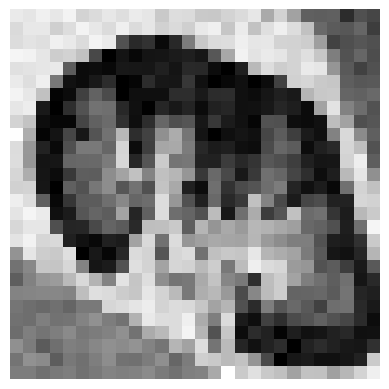

5


In [29]:
def plot_organ(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_organ = train_images_flat[0]
plot_organ(some_organ)
plt.show()
print(train_labels_flat[0])

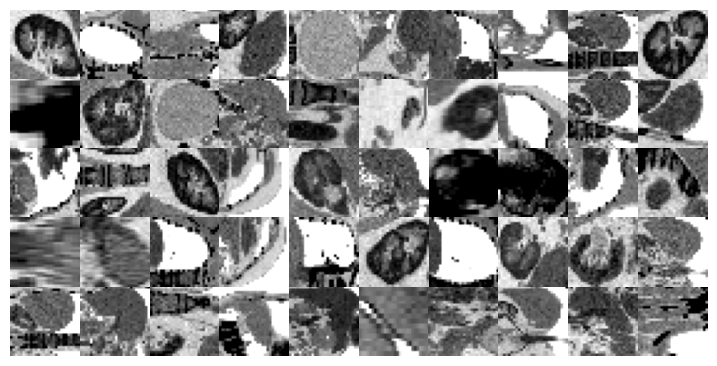

[ 5  8  6 10  0 10  8 10  6  4  1  4  0  6  9  4  4  8  6 10  7  9  5  7
  5  6  1  2  7  5  0  5  8  7  8  4  8  4  4  6  6  6  9  6  6  1  9  6
  9  9]


In [30]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X_train[:50]):
    plt.subplot(10, 10, idx + 1)
    plot_organ(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
#save_fig("more_digits_plot", tight_layout=False)
plt.show()
print(y_train[:50])

## Binary Classification

In [214]:
y_train_3 = (y_train == 3)  # True for all heart images, 
                              # False for all other digits
y_val_3 = (y_val == 3)
y_test_3 = (y_test == 3)


In [217]:
y_train_3_comb = np.concatenate((y_train_3, y_val_3), axis=0)

In [245]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_combined_sc, y_train_3_comb)

SGDClassifier(random_state=42)

In [246]:
y_bi_pred_sgd_clf_train = sgd_clf.predict(X_train_combined_sc)

In [247]:
evaluate_model(y_train_3_comb, y_bi_pred_sgd_clf_train, "SGD CLF Train")

--- SGD CLF Train ---
Confusion Matrix:
[[14555    10]
 [   51   751]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     14565
        True       0.99      0.94      0.96       802

    accuracy                           1.00     15367
   macro avg       0.99      0.97      0.98     15367
weighted avg       1.00      1.00      1.00     15367

Accuracy: 0.9960304548708271
Precision: 0.9960047111057385
Recall: 0.9960304548708271
F1 Score: 0.9959811807078311




In [248]:
y_bi_pred_sgd_clf = sgd_clf.predict(X_test_scaled)

In [275]:
evaluate_model(y_test_3, y_bi_pred_sgd_clf, "SGD CLF")

--- SGD CLF ---
Confusion Matrix:
[[7779   16]
 [ 106  315]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7795
           1       0.95      0.75      0.84       421

    accuracy                           0.99      8216
   macro avg       0.97      0.87      0.91      8216
weighted avg       0.98      0.99      0.98      8216

Accuracy: 0.9851509250243428
Precision: 0.9847686756363407
Recall: 0.9851509250243428
F1 Score: 0.9843049653890125




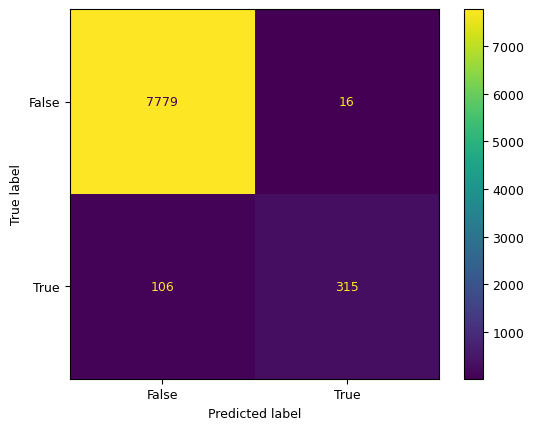

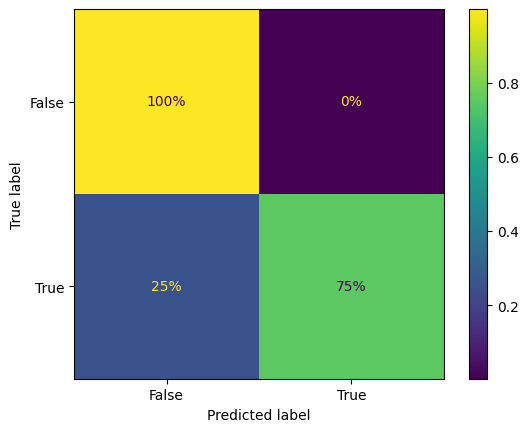

In [250]:
confusion_matrix_plot(y_test_3, y_bi_pred_sgd_clf)

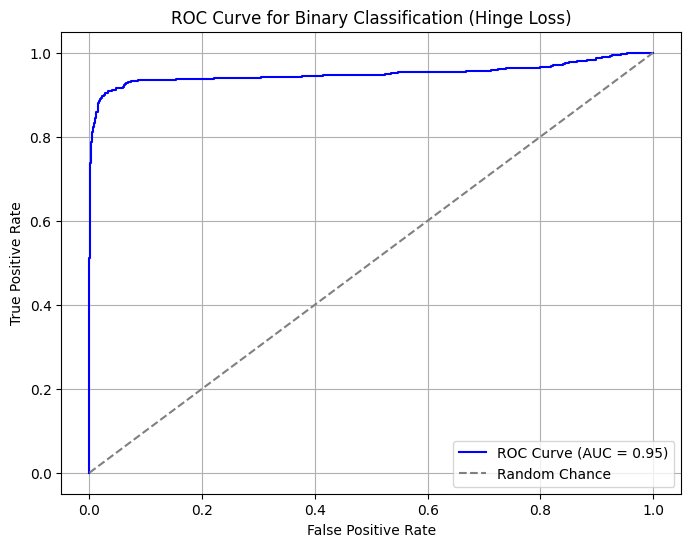

In [257]:
# Compute decision scores instead of probabilities
y_pred_decision = sgd_clf.decision_function(X_test_scaled)

# Compute ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test_3, y_pred_decision)
roc_auc = roc_auc_score(y_test_3, y_pred_decision)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification (Hinge Loss)')
plt.legend()
plt.grid()
plt.show()


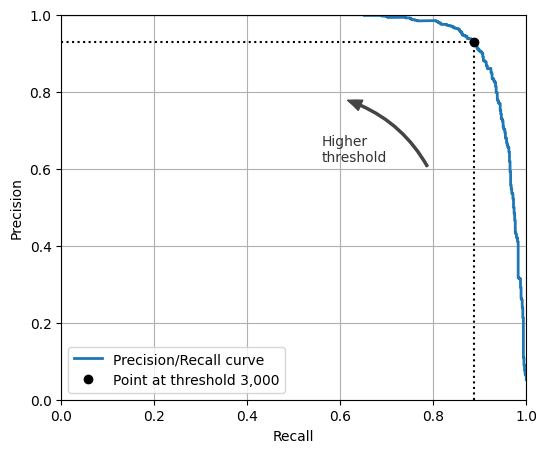

In [255]:
import matplotlib.patches as patches  

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

## SVM

In [12]:
# Initialize variables to track the best accuracy and hyperparameters
best_accuracy = 0
best_params = None

# Define the ranges of hyperparameters to test
C_values = [0.1, 1, 10]
kernels = ['linear', 'rbf', 'poly']
max_iter = -1  # -1 for no limit

# Loop through all combinations of hyperparameters
for C in C_values:
    for kernel in kernels:
        # Create the SVM model with current hyperparameters
        svm_model = SVC(C=C, kernel=kernel, probability=True, max_iter=max_iter, random_state=42)
        svm_model.fit(X_train_scaled, y_train)

        # Validate the model
        val_predictions = svm_model.predict(X_val_scaled)
        val_accuracy = accuracy_score(y_val, val_predictions)

        # Output the results
        print(f"Params: C={C}, kernel={kernel}, => Validation Accuracy: {val_accuracy}")

        # Keep track of the best hyperparameters
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_params = (C, kernel)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params, "max_iter = -1")


Params: C=0.1, kernel=linear, => Validation Accuracy: 0.754180602006689
Params: C=0.1, kernel=rbf, => Validation Accuracy: 0.903010033444816
Params: C=0.1, kernel=poly, => Validation Accuracy: 0.6212374581939799
Params: C=1, kernel=linear, => Validation Accuracy: 0.7228260869565217
Params: C=1, kernel=rbf, => Validation Accuracy: 0.9247491638795987
Params: C=1, kernel=poly, => Validation Accuracy: 0.8578595317725752
Params: C=10, kernel=linear, => Validation Accuracy: 0.7215719063545151
Params: C=10, kernel=rbf, => Validation Accuracy: 0.9092809364548495
Params: C=10, kernel=poly, => Validation Accuracy: 0.8419732441471572
Best Hyperparameters: (1, 'rbf') max_iter = -1


### Linear SVM

In [20]:
svm_model = SVC(C=0.1, kernel='linear', probability=True,
                max_iter=max_iter, random_state=42)
start_time = time.time()
svm_model.fit(X_train_combined_sc, y_train_combined)
end_time = time.time()
time_svm = end_time - start_time

In [269]:
time_svm

463.142719745636

In [26]:
y_pred_svm = svm_model.predict(X_test_scaled)

In [126]:
y_pred_svm_train = svm_model.predict(X_train_combined_sc)

In [127]:
evaluate_model(y_train_combined, y_pred_svm_train, "Linear SVM Train")

--- Linear SVM Train ---
Confusion Matrix:
[[1240    5    6    0   30   21    5    0    0   20   12]
 [  48  581   10    0   30   22    1    0    1   22    6]
 [  33    6  592    0   18   14    2    0    0   25    1]
 [   0    0    0  802    0    0    0    0    0    0    0]
 [  39    7   12    0 1072   36    0    1    0   25   28]
 [  53    8   13    0   60 1152    9    0    0   29    3]
 [   3    0    0    0    0    1 3405    0    0    0    6]
 [   0    0    0    0    0    0    0 1349    0    0    0]
 [   1    0    0    0    0    0    0    0 1373    0    0]
 [  30    9   17    0   16   28    1    0    0 1235   16]
 [  25   16    3    0   10   15   17    4    1   48 1638]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1339
           1       0.92      0.81      0.86       721
           2       0.91      0.86      0.88       691
           3       1.00      1.00      1.00       802
           4       0.87

In [27]:
evaluate_model(y_test, y_pred_svm, "Linear SVM")

--- Linear SVM ---
Confusion Matrix:
[[ 521   28   26    0  106   39   22    3    1   34   48]
 [  72  172   21    1   28   35   13    0    2   72   15]
 [  54   36  210    1   35   22   10    0    0   39   14]
 [  33    5    1  322    6    1    1   15    0    4   33]
 [ 107   63   51    2  328   67   17    3    3   40   46]
 [  98   64   32    0   93  323   26    3    1   72   23]
 [  65   24   89   14   26   37 1461    0    0   27   92]
 [  21    1    1    0   14    2    1  493    9    1    6]
 [   9    2    2    0    2    0   14    8  517    1    2]
 [ 135   56  100    1   55   66   16    0    0  280   41]
 [  70   54   20   12   88   42   76    6    1   72  521]]

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.63      0.52       828
           1       0.34      0.40      0.37       431
           2       0.38      0.50      0.43       421
           3       0.91      0.76      0.83       421
           4       0.42      

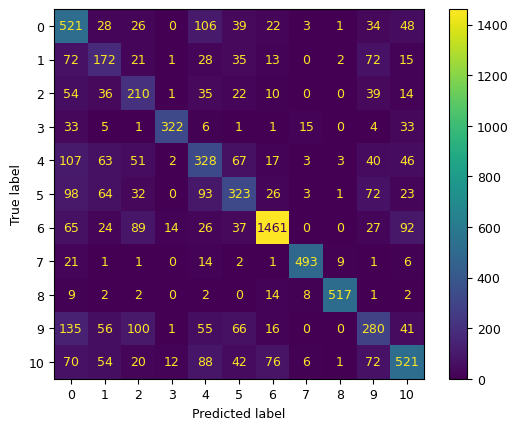

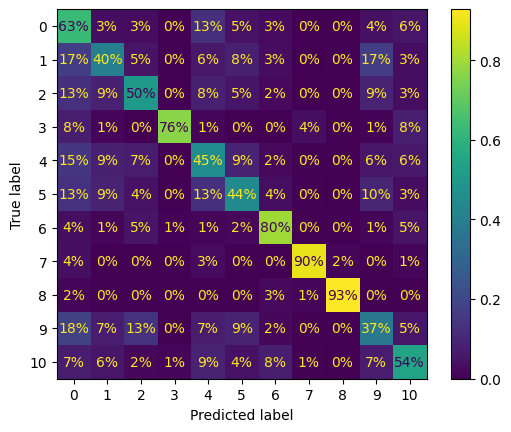

In [28]:
confusion_matrix_plot(y_test, y_pred_svm)

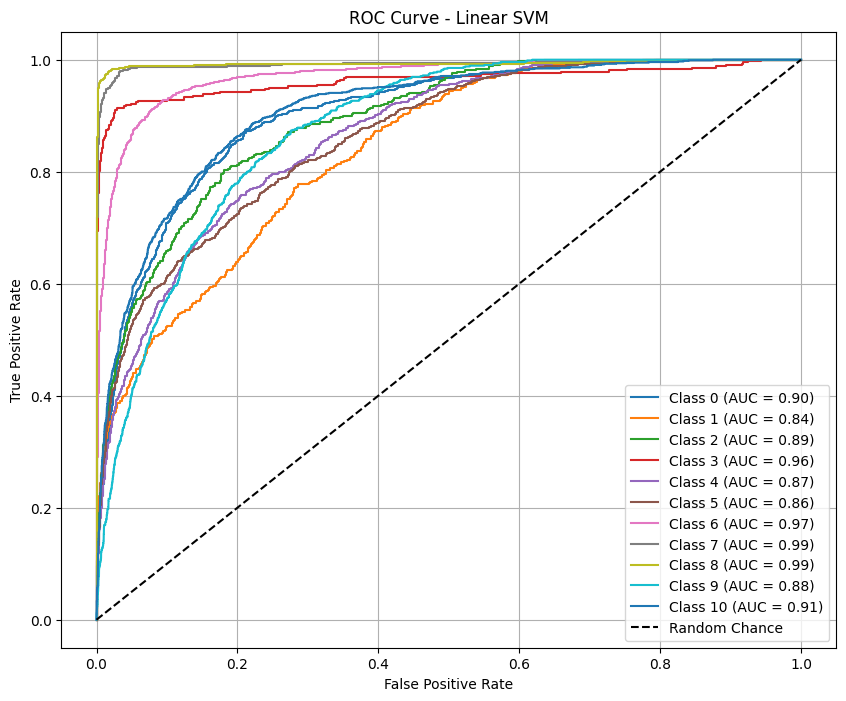

In [101]:
plot_roc_curve(y_test, svm_model.predict_proba(X_test_scaled), "Linear SVM")

### RBF SVM

In [276]:
svm_model_rbf = SVC(C=1, kernel='rbf', probability=True,
                max_iter=-1,gamma='scale', random_state=42)
start_time = time.time()
svm_model_rbf.fit(X_train_combined_sc, y_train_combined)
end_time = time.time()
time_svm_rbf = end_time - start_time

In [277]:
time_svm_rbf

400.0830419063568

In [278]:
y_pred_svm_rbf = svm_model_rbf.predict(X_test_scaled)

In [280]:
y_pred_svm_rbf_train = svm_model.predict(X_train_combined_sc)

In [281]:
evaluate_model(y_train_combined, y_pred_svm_rbf_train, "RBF SVM Train")

--- RBF SVM Train ---
Confusion Matrix:
[[1240    5    6    0   30   21    5    0    0   20   12]
 [  48  581   10    0   30   22    1    0    1   22    6]
 [  33    6  592    0   18   14    2    0    0   25    1]
 [   0    0    0  802    0    0    0    0    0    0    0]
 [  39    7   12    0 1072   36    0    1    0   25   28]
 [  53    8   13    0   60 1152    9    0    0   29    3]
 [   3    0    0    0    0    1 3405    0    0    0    6]
 [   0    0    0    0    0    0    0 1349    0    0    0]
 [   1    0    0    0    0    0    0    0 1373    0    0]
 [  30    9   17    0   16   28    1    0    0 1235   16]
 [  25   16    3    0   10   15   17    4    1   48 1638]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1339
           1       0.92      0.81      0.86       721
           2       0.91      0.86      0.88       691
           3       1.00      1.00      1.00       802
           4       0.87   

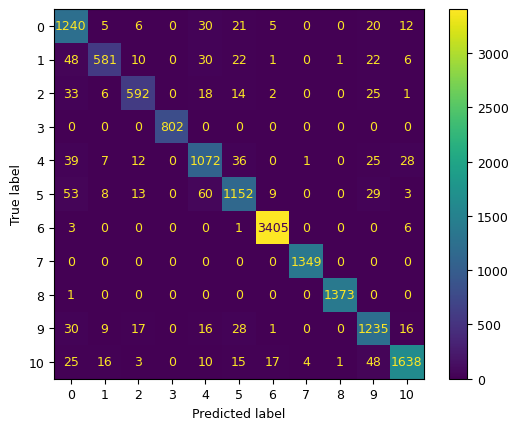

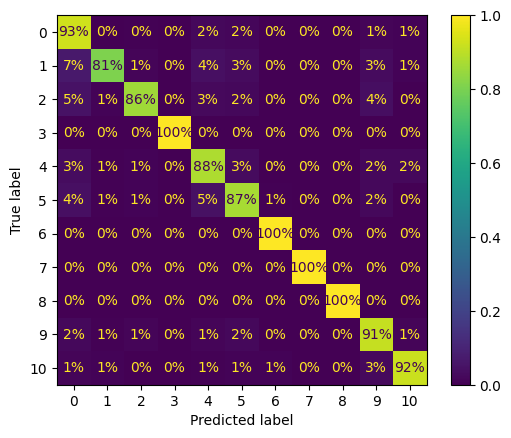

In [302]:
confusion_matrix_plot(y_train_combined, y_pred_svm_rbf_train)

In [282]:
evaluate_model(y_test, y_pred_svm_rbf, "RBF SVM")

--- RBF SVM ---
Confusion Matrix:
[[ 694    9    7    0   28   25   13    0    1   34   17]
 [  57  248   20    0   20   16    5    0    6   54    5]
 [  48   15  289    0    6    9    3    0    1   33   17]
 [   7    0    0  353    2    1    1   14    0    3   40]
 [  77   13   10    0  449   66   17    6    3   57   29]
 [  90    4    7    0   98  411   23    6    2   71   23]
 [   9    0    6    0   24    9 1728    0    1    5   53]
 [   0    0    0    0    1    0    0  526   10    3    9]
 [   0    0    0    0    2    0    8    0  547    0    0]
 [  63    0   19    0   32   42   13    0    0  566   15]
 [  19    6    9    7   64   32   33    2    1   59  730]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.84      0.73       828
           1       0.84      0.58      0.68       431
           2       0.79      0.69      0.73       421
           3       0.98      0.84      0.90       421
           4       0.62      0.6

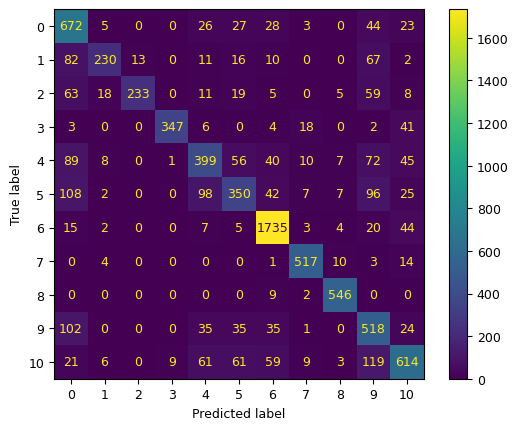

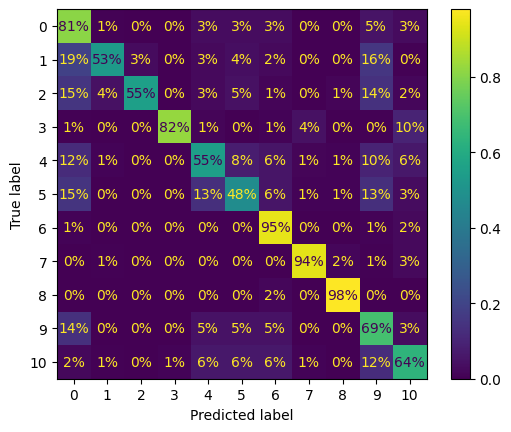

In [266]:
confusion_matrix_plot(y_test, y_pred_svm_rbf)

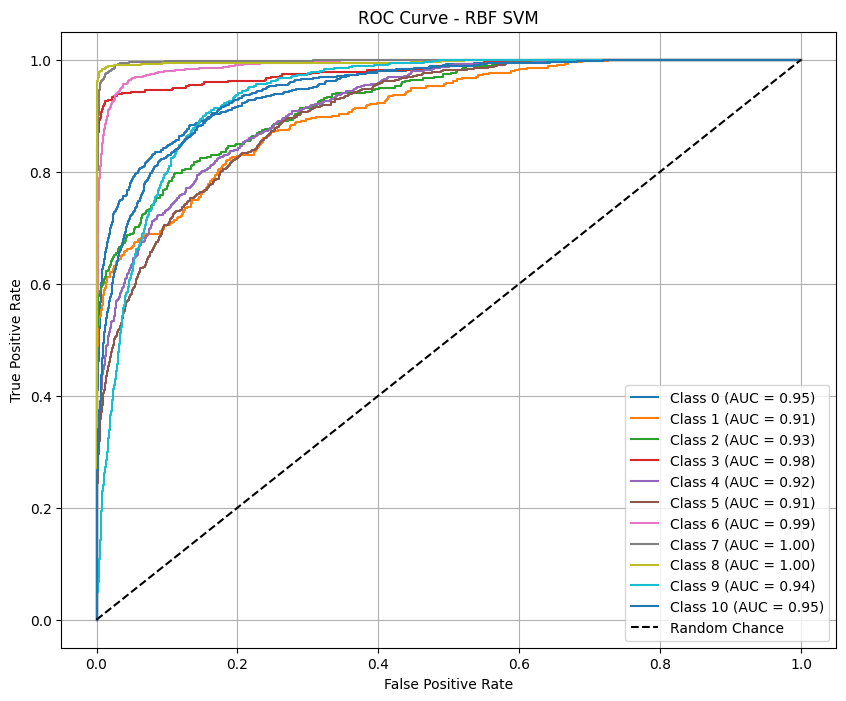

In [268]:
plot_roc_curve(y_test, svm_model_rbf.predict_proba(X_test_scaled), "RBF SVM")

## Softmax Regression

In [40]:
softmax_model = LogisticRegression(C=0.01, multi_class='multinomial', 
                                   max_iter=1000, tol=0.0001, random_state=42 )
start_time = time.time()
softmax_model.fit(X_train_combined_sc, y_train_combined)
end_time = time.time()
time_softmax = end_time - start_time

In [118]:
time_softmax

35.396273136138916

In [41]:
y_pred_softmax = softmax_model.predict(X_test_scaled)

In [119]:
y_pred_softmax_train = softmax_model.predict(X_train_combined_sc)

In [120]:
evaluate_model(y_train_combined, y_pred_softmax_train, "Softmax Regression Train")

--- Softmax Regression Train ---
Confusion Matrix:
[[ 993    4    5    2   62   89   68    2    1   55   58]
 [  54  475   22    1   32   44   18    4    0   54   17]
 [  51    7  516    0   34   23   10    0    2   35   13]
 [   3    2    0  779    1    0    7    0    1    1    8]
 [ 102   10   16    0  789   80   38    8    7   69  101]
 [  82   13    8    1   90  970   53    3    2   73   32]
 [  17    4    6    5   18    8 3254    1    2   19   81]
 [   7    0    0    0    0    0    0 1333    5    0    4]
 [   3    0    0    0    0    1    5    0 1353    7    5]
 [  76   13   25    6   55   76   22    0    0 1003   76]
 [  59    6    3    5   31   49   93    9    3   95 1424]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.74      0.71      1339
           1       0.89      0.66      0.76       721
           2       0.86      0.75      0.80       691
           3       0.97      0.97      0.97       802
           4   

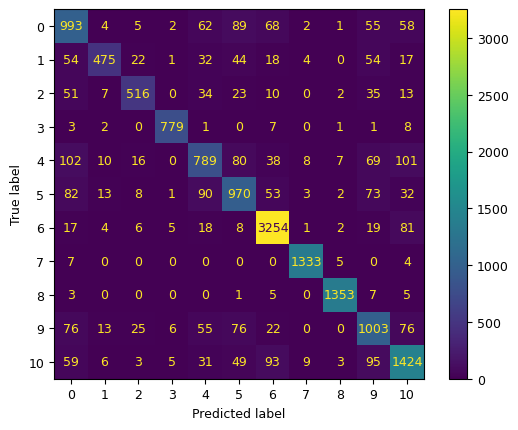

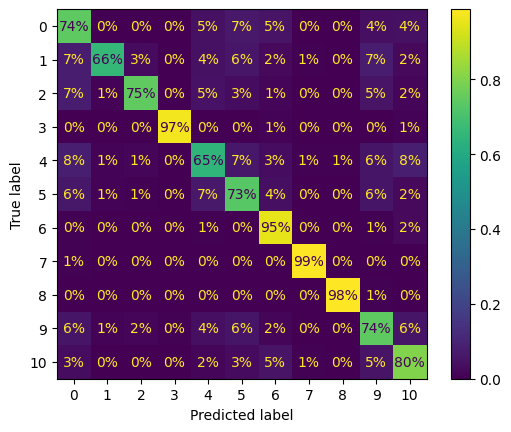

In [303]:
confusion_matrix_plot(y_train_combined, y_pred_softmax_train)

In [74]:
softmax_model.predict_proba(X_test_scaled).

2

In [164]:
evaluate_model(y_test, y_pred_softmax, "Softmax Regression")

--- Softmax Regression ---
Confusion Matrix:
[[ 530    0    3    0   90   45   51    4    4   37   64]
 [  40  183   17    2   33   40   15    7    2   71   21]
 [  48   20  229    1   30   18   17    0    4   42   12]
 [  18    0    0  339    5    0    0   12    0    6   41]
 [  94   11   10    3  365   93   43    8    5   45   50]
 [  90    4    2    2   90  385   43    6    5   72   36]
 [  25    0   30    4   13   19 1632    0    1   12   99]
 [  19    0    0    0   10    1    4  494    6    3   12]
 [   1    0    0    0    3    0   20    7  524    2    0]
 [  96    8   71    2   48   79   43    1    2  348   52]
 [  45   16    4   13   59   80   76   11    2   78  578]]

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.64      0.58       828
           1       0.76      0.42      0.54       431
           2       0.63      0.54      0.58       421
           3       0.93      0.81      0.86       421
           4       0.

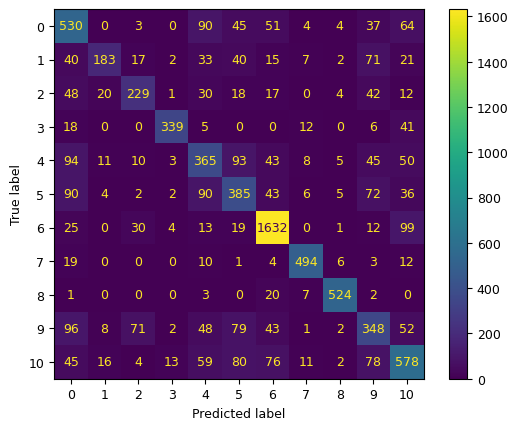

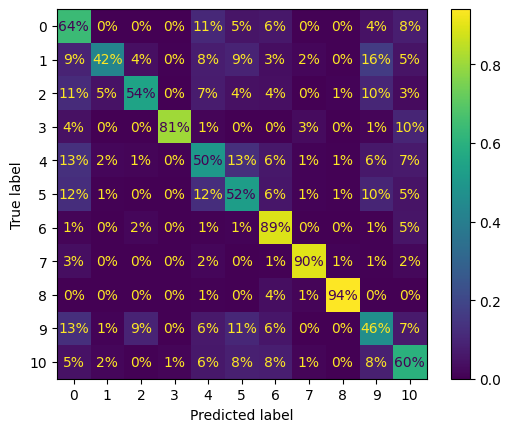

In [167]:
confusion_matrix_plot(y_test, y_pred_softmax)

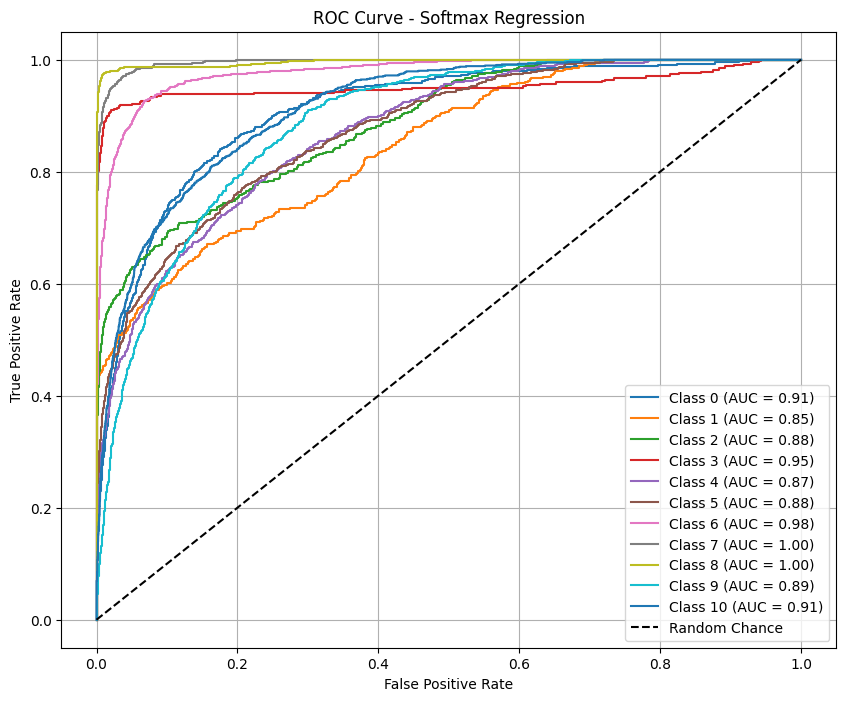

In [168]:
plot_roc_curve(y_test, softmax_model.predict_proba(X_test_scaled), "Softmax Regression")

## Decision Tree

In [48]:
decision_tree_model = DecisionTreeClassifier(
            max_depth=10,
            min_samples_split=5,
            random_state=42
        )

In [49]:
start_time = time.time()
decision_tree_model.fit(X_train_combined_sc, y_train_combined)
end_time = time.time()
time_decision_tree = end_time - start_time

In [115]:
time_decision_tree

19.42542266845703

In [50]:
y_pred_decision_tr = decision_tree_model.predict(X_test_scaled)

In [116]:
y_pred_decision_train = decision_tree_model.predict(X_train_combined_sc)

In [283]:
evaluate_model(y_train_combined, y_pred_decision_train, "Decision Tree Train")

--- Decision Tree Train ---
Confusion Matrix:
[[1119    3    1    0   72   24    4    3    1   91   21]
 [  74  505    8    1   24   44    1    0    1   63    0]
 [  73    6  466    0   33   33    1    1    1   77    0]
 [   1    2    0  768    8    2    7    1    0    4    9]
 [ 139    2    1    4  745  145    2    2    2  161   17]
 [ 125    0    1    2  199  845    6    1    0  133   15]
 [  41    0    0    2   57   18 3222    0    0   54   21]
 [   3    0    0    0    6    2    1 1312    7   14    4]
 [   9    0    0    0    9    0    1    2 1332   12    9]
 [ 100    0    0    0  149  183    6    2    0  890   22]
 [  46    1    2    1   58   62   31    1    2  148 1425]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.84      0.73      1339
           1       0.97      0.70      0.81       721
           2       0.97      0.67      0.80       691
           3       0.99      0.96      0.97       802
           4       0

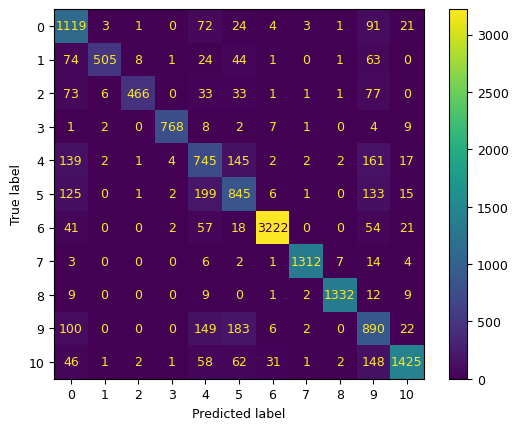

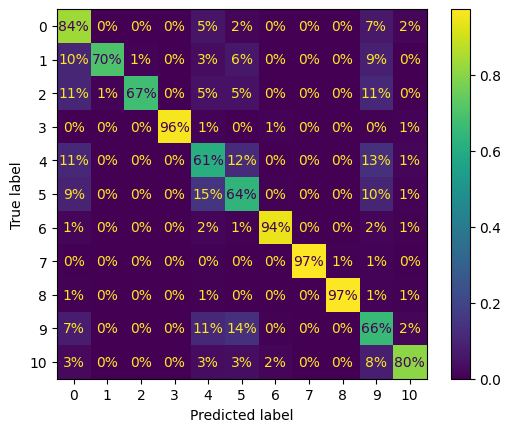

In [304]:
confusion_matrix_plot(y_train_combined, y_pred_decision_train)

In [51]:
evaluate_model(y_test, y_pred_decision_tr, "Decision Tree")

--- Decision Tree ---
Confusion Matrix:
[[ 645    5    1    0   46   29   11    6    1   59   25]
 [  85  192   22    0   19   34    4    1    1   71    2]
 [  77   22  196    0   21   45    3    0    3   54    0]
 [  12    3    0  257   16    4   32   11    9    7   70]
 [ 130    8    3    2  336   84   17    7    2  120   18]
 [ 141    4    6    0   90  349   12    7    4  102   20]
 [  60    0    3    6   59   23 1549   11    7   29   88]
 [   6    0    0    8   15    6    4  475   20    8    7]
 [   8    0    2    4   11    0   11   23  480    0   18]
 [ 122    1    6    1  129  112   13    1    0  355   10]
 [  35    6    0   33   73  100   82    9    7   95  522]]

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.78      0.60       828
           1       0.80      0.45      0.57       431
           2       0.82      0.47      0.59       421
           3       0.83      0.61      0.70       421
           4       0.41   

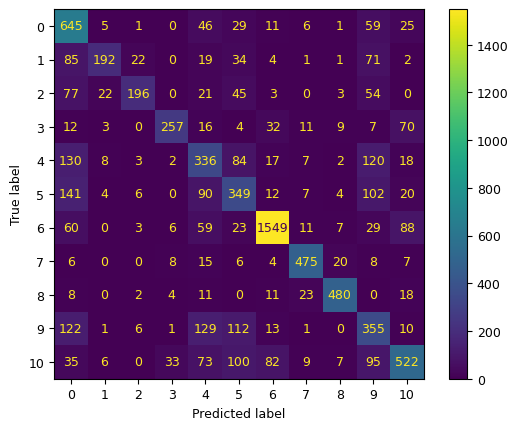

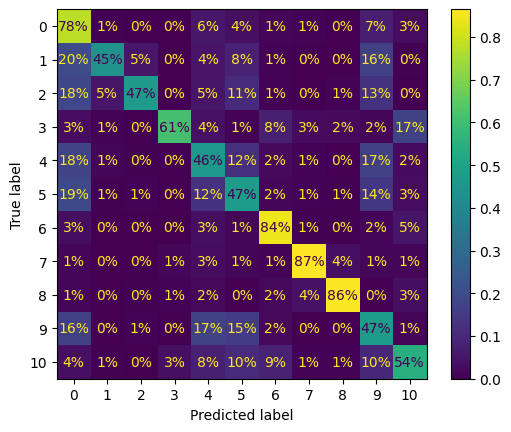

In [53]:
confusion_matrix_plot(y_test, y_pred_decision_tr)

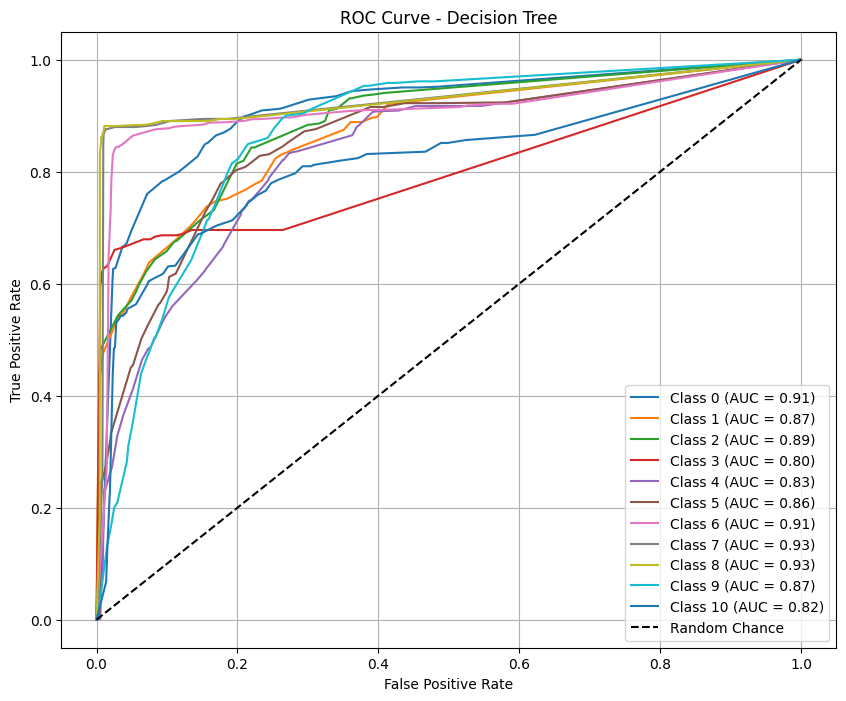

In [169]:
plot_roc_curve(y_test, decision_tree_model.predict_proba(X_test_scaled), "Decision Tree")

# Enesemble Learning

## Random Forest

In [170]:
random_forest_model = RandomForestClassifier(
                n_estimators=100,
                max_depth=20,
                min_samples_split=10,
                random_state=42
            )

In [171]:
start_time = time.time()
random_forest_model.fit(X_train_combined_sc, y_train_combined)
end_time = time.time()
time_random_forest = end_time - start_time

In [172]:
time_random_forest

58.38581347465515

In [173]:
y_pred_random_forest = random_forest_model.predict(X_test_scaled)

In [174]:
y_pred_random_forest_train = random_forest_model.predict(X_train_combined_sc)

In [175]:
evaluate_model(y_train_combined, y_pred_random_forest_train, "Random Forest Train")

--- Random Forest Train ---
Confusion Matrix:
[[1338    0    0    0    0    0    0    0    1    0    0]
 [   8  691    0    0    0    1    0    0    1   20    0]
 [  12    0  674    0    0    0    1    0    0    4    0]
 [   0    0    0  802    0    0    0    0    0    0    0]
 [   2    0    0    0 1214    0    0    0    0    1    3]
 [   0    0    0    0    2 1322    2    0    0    1    0]
 [   0    0    0    0    0    0 3415    0    0    0    0]
 [   0    0    0    0    0    0    0 1349    0    0    0]
 [   0    0    0    0    0    0    0    0 1371    3    0]
 [   1    0    0    0    0    0    0    0    0 1351    0]
 [   0    0    0    0    0    0    0    0    0    0 1777]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1339
           1       1.00      0.96      0.98       721
           2       1.00      0.98      0.99       691
           3       1.00      1.00      1.00       802
           4       1

In [176]:
evaluate_model(y_test, y_pred_random_forest, "Random Forest")

--- Random Forest ---
Confusion Matrix:
[[ 689   12    5    0   25   12   20    5    0   41   19]
 [  43  272    8    0   10   13    1    1    4   76    3]
 [  45   23  278    0   10    4    1    0    0   60    0]
 [   3    0    0  355    2    0    8   17    0    2   34]
 [  34   17    1    0  449   66   26   11    6   91   26]
 [  70    6    9    0   87  443   22    8    4   68   18]
 [   1    0    4    0    5    0 1791    4    2    8   20]
 [   0    0    2    0    1    0    3  530    6    1    6]
 [   0    0    0    0    0    1    6    4  546    0    0]
 [  24    2    1    0   46   30    3    3    0  625   16]
 [   3    5    0    6   32   33   40   11    1   43  788]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       828
           1       0.81      0.63      0.71       431
           2       0.90      0.66      0.76       421
           3       0.98      0.84      0.91       421
           4       0.67   

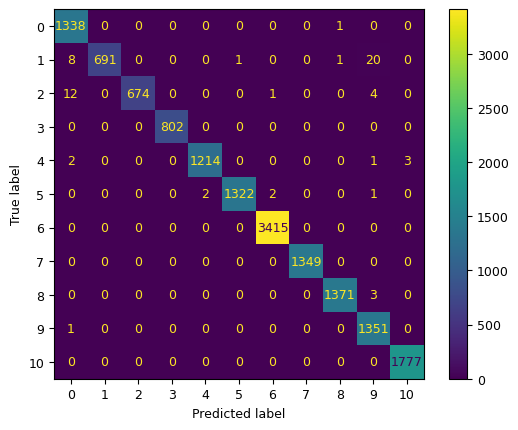

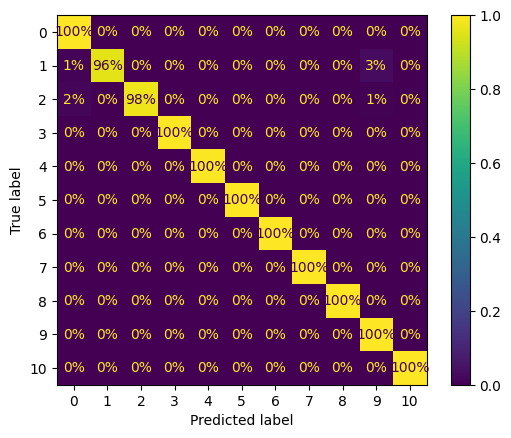

In [305]:
confusion_matrix_plot(y_train_combined, y_pred_random_forest_train)

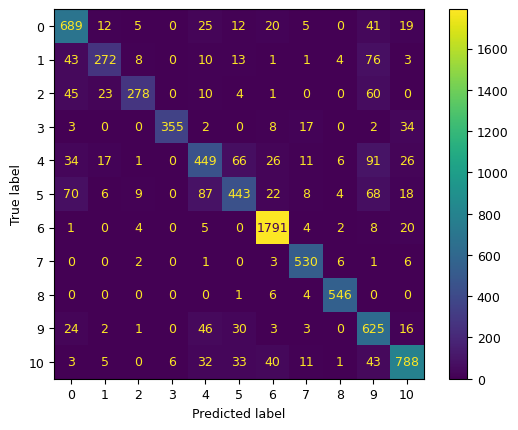

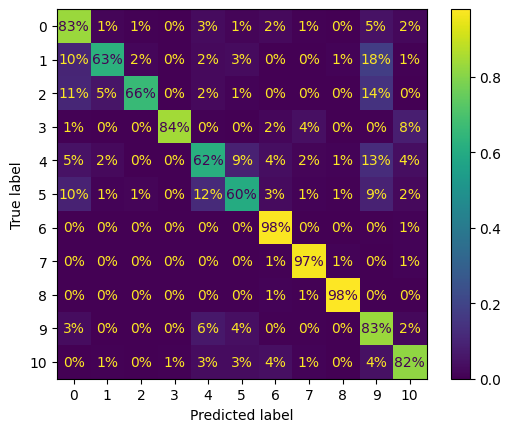

In [177]:
confusion_matrix_plot(y_test, y_pred_random_forest)

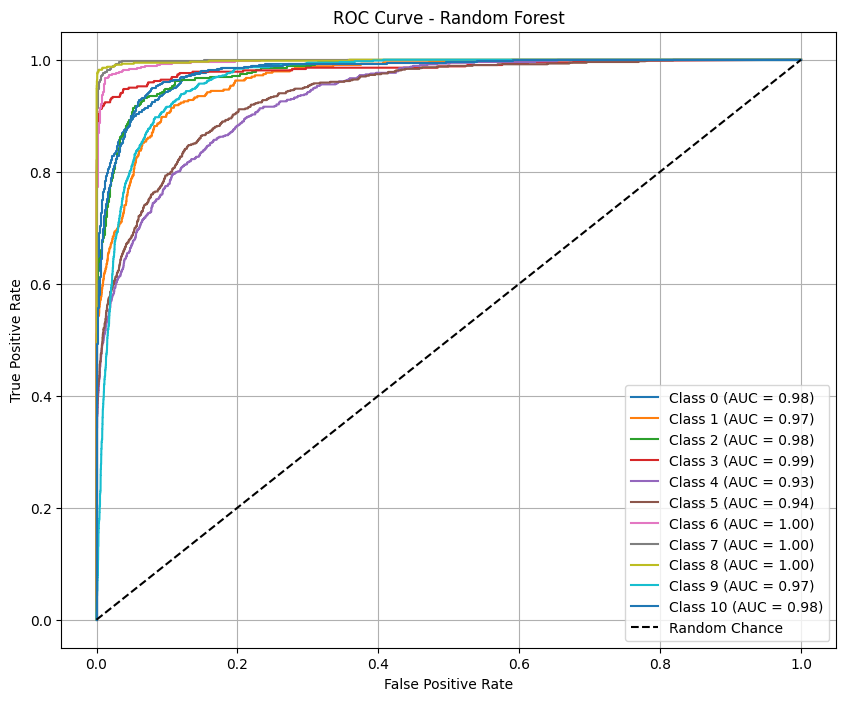

In [178]:
plot_roc_curve(y_test, random_forest_model.predict_proba(X_test_scaled), "Random Forest")

## Voting Classifier`

In [87]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(C=0.01, multi_class='multinomial', 
                                   max_iter=1000, tol=0.0001, random_state=42 )),
        ('rf', RandomForestClassifier(
                n_estimators=100,
                max_depth=20,
                min_samples_split=10,
                random_state=42
            )),
        ('svc', SVC(C=1, kernel='rbf', max_iter=-1,gamma='scale', probability=True, random_state=42))
    ],
    voting='soft',
)

In [88]:
start_time = time.time()
voting_clf.fit(X_train_combined_sc, y_train_combined)
end_time = time.time()
time_voting_clf = end_time - start_time

In [89]:
time_voting_clf

535.2728250026703

In [90]:
y_pred_voting_clf = voting_clf.predict(X_test_scaled)

In [124]:
y_pred_voting_clf_train = voting_clf.predict(X_train_combined_sc)

In [125]:
evaluate_model(y_train_combined, y_pred_voting_clf_train, "Voting CLF Train")

--- Voting CLF Train ---
Confusion Matrix:
[[1288    3    1    0    7   14    7    1    2   11    5]
 [  31  620   10    0    9   10    3    0    2   32    4]
 [  31    9  612    0    4    6    2    0    1   21    5]
 [   0    0    0  797    0    0    0    0    0    0    5]
 [  27    0    1    0 1105   18    6    0    2   28   33]
 [  46    0    2    0   17 1220    9    0    0   24    9]
 [   2    0    1    0    0    0 3409    0    0    3    0]
 [   0    0    0    0    0    0    0 1349    0    0    0]
 [   0    0    0    0    0    0    0    0 1366    8    0]
 [  15    0    0    0   12   11    0    0    0 1311    3]
 [  15    1    4    0   10    5    4    0    0   16 1722]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1339
           1       0.98      0.86      0.92       721
           2       0.97      0.89      0.93       691
           3       1.00      0.99      1.00       802
           4       0.95

In [91]:
evaluate_model(y_test, y_pred_voting_clf, "Voting CLF")

--- Voting CLF ---
Confusion Matrix:
[[ 688    8    7    0   29   28   14    1    3   34   16]
 [  45  255   19    0   16   14    9    0    7   61    5]
 [  47   26  291    1    6    4    1    0    2   31   12]
 [  10    0    0  358    1    0    0   14    0    1   37]
 [  64   15    5    1  435   79   18    7    7   61   35]
 [  83    3    7    0   88  429   28    6    4   64   23]
 [   4    0    6    0    7    8 1745    1    3    2   59]
 [   0    0    0    0    5    0    2  520    7    2   13]
 [   0    0    0    0    0    0    9    1  547    0    0]
 [  49    1   31    0   30   55   12    0    0  554   18]
 [  14    5    4    9   44   52   33   10    2   36  753]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       828
           1       0.81      0.59      0.69       431
           2       0.79      0.69      0.74       421
           3       0.97      0.85      0.91       421
           4       0.66      

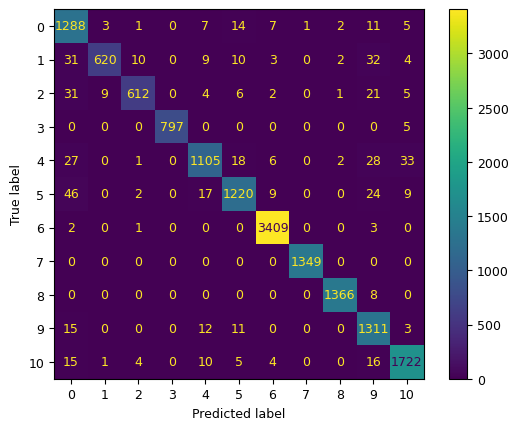

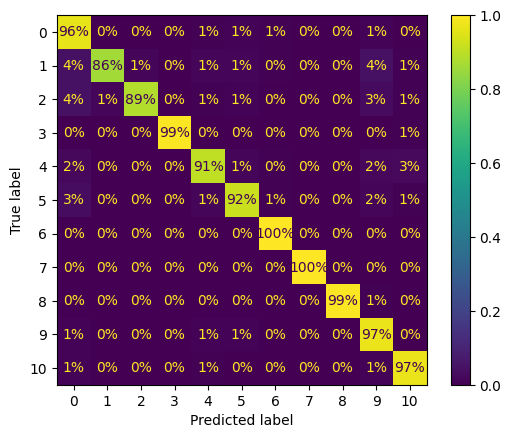

In [306]:
confusion_matrix_plot(y_train_combined, y_pred_voting_clf_train)

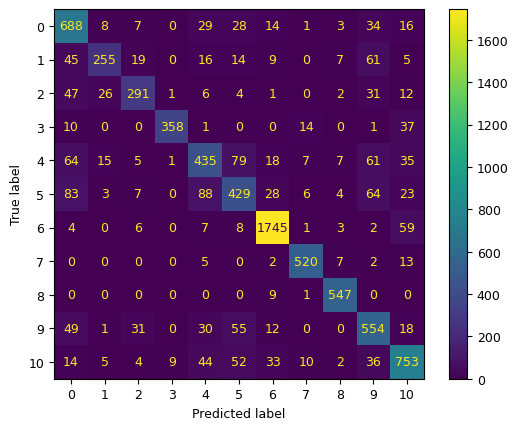

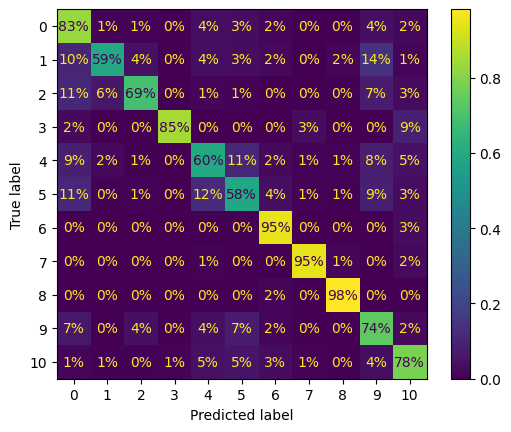

In [92]:
confusion_matrix_plot(y_test, y_pred_voting_clf)

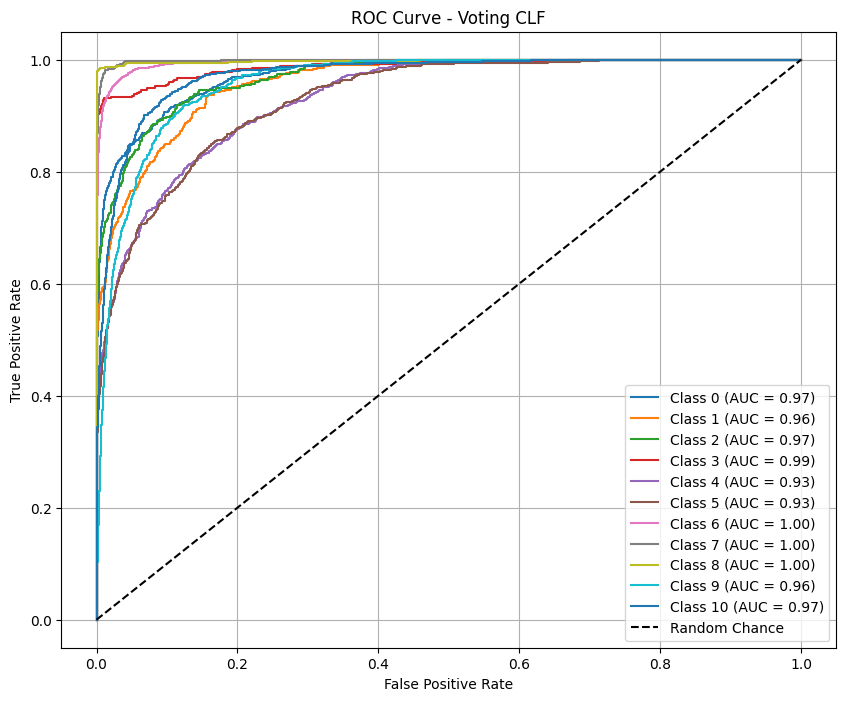

In [93]:
plot_roc_curve(y_test, voting_clf.predict_proba(X_test_scaled), "Voting CLF")

In [292]:
voting_clf_2 = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(C=0.01, multi_class='multinomial', 
                                   max_iter=1000, tol=0.0001, random_state=42 )),
        ('rf', RandomForestClassifier(
                n_estimators=100,
                max_depth=5,
                min_samples_split=2,
                random_state=42
            )),
        ('svc', SVC(C=0.1, kernel='linear', max_iter=-1, probability=True, random_state=42))
    ],
    voting='soft',
)

In [293]:
start_time = time.time()
voting_clf_2.fit(X_train_combined_sc, y_train_combined)
end_time = time.time()
time_voting_clf_2 = end_time - start_time

In [294]:
time_voting_clf_2

295.96981930732727

In [295]:
y_pred_voting_clf_2 = voting_clf_2.predict(X_test_scaled)

In [296]:
y_pred_voting_clf_2_train = voting_clf_2.predict(X_train_combined_sc)

In [298]:
evaluate_model(y_train_combined, y_pred_voting_clf_2_train, "Voting CLF Train")

--- Voting CLF Train ---
Confusion Matrix:
[[1103    3    1    3   40   55   47    3    0   45   39]
 [  61  504   12    0   32   34    9    2    3   56    8]
 [  50    3  523    0   27   24   12    0    5   39    8]
 [   0    0    0  801    0    0    0    0    0    0    1]
 [  88    0    1    0  888   63   24    3    6   69   78]
 [  76    1    4    0   80 1029   44    2    0   67   24]
 [   2    0    0    0    0    0 3397    0    0    0   16]
 [   0    0    0    0    0    0    0 1349    0    0    0]
 [   0    0    0    0    0    0    0    0 1374    0    0]
 [  49    1    7    3   28   53    7    0    0 1174   30]
 [  38    0    0    2   15   46   76    9    6   79 1506]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.79      1339
           1       0.98      0.70      0.82       721
           2       0.95      0.76      0.84       691
           3       0.99      1.00      0.99       802
           4       0.80

In [299]:
evaluate_model(y_test, y_pred_voting_clf_2, "Voting CLF")

--- Voting CLF ---
Confusion Matrix:
[[ 552    0    2    0   89   37   44    5    3   38   58]
 [  53  188   15    2   24   35   13    5    7   78   11]
 [  50   22  225    1   26   17   12    0    6   49   13]
 [  16    0    0  338    3    0    0   14    0    4   46]
 [  95   12    8    2  370   94   35    8    6   52   45]
 [  84    7    5    0   92  382   41    5    4   86   29]
 [  14    0   16    5    5   11 1695    1    1   11   76]
 [  11    0    0    0    8    1    4  504    9    1   11]
 [   0    0    0    0    0    0   17    5  533    1    1]
 [  93    7   50    2   40   85   32    0    0  397   44]
 [  34    2    2   11   57   70   82   13    1   85  605]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.67      0.60       828
           1       0.79      0.44      0.56       431
           2       0.70      0.53      0.60       421
           3       0.94      0.80      0.86       421
           4       0.52      

## AdaboostClassifier`

In [258]:
ada_model = AdaBoostClassifier(
                DecisionTreeClassifier(
                                max_depth=10,
                                min_samples_split=5,
                                random_state=42
                                ),
                n_estimators=200,
                learning_rate=1.0,
                random_state=42
            )

In [ ]:
start_time = time.time()
ada_model.fit(X_train_combined_sc, y_train_combined)
end_time = time.time()
time_ada_model = end_time - start_time

In [104]:
time_ada_model

6105.5557515621185

In [107]:
y_pred_ada = ada_model.predict(X_test_scaled)

In [108]:
y_pred_ada_train = ada_model.predict(X_train_combined_sc)

In [110]:
evaluate_model(y_train_combined, y_pred_ada_train, "Adaboost CLF Train")

--- Adaboost CLF Train ---
Confusion Matrix:
[[1339    0    0    0    0    0    0    0    0    0    0]
 [   0  721    0    0    0    0    0    0    0    0    0]
 [   0    0  691    0    0    0    0    0    0    0    0]
 [   0    0    0  802    0    0    0    0    0    0    0]
 [   0    0    0    0 1220    0    0    0    0    0    0]
 [   0    0    0    0    0 1327    0    0    0    0    0]
 [   0    0    0    0    0    0 3415    0    0    0    0]
 [   0    0    0    0    0    0    0 1349    0    0    0]
 [   0    0    0    0    0    0    0    0 1374    0    0]
 [   0    0    0    0    0    0    0    0    0 1352    0]
 [   0    0    0    0    0    0    0    0    0    0 1777]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1339
           1       1.00      1.00      1.00       721
           2       1.00      1.00      1.00       691
           3       1.00      1.00      1.00       802
           4       1.

In [112]:
evaluate_model(y_test, y_pred_ada, "Adaboost CLF")

--- Adaboost CLF ---
Confusion Matrix:
[[ 672    2    2    0   37   23   13    2    3   52   22]
 [  34  261   16    0   25   17    1    0    1   74    2]
 [  38   16  291    0   15   11    0    0    0   49    1]
 [   2    0    0  318    0    1    7   15    0    3   75]
 [  21   11    2    0  474   54   20    2    3  102   38]
 [  54    0    9    0  118  425   17    3    1   83   25]
 [   3    0    3    0    3    3 1794    3    1   12   13]
 [   0    0    0    0    0    0    1  515   10    2   21]
 [   0    0    0    0    4    0    9    1  543    0    0]
 [  22    0    0    0   52   30    5    0    0  626   15]
 [   0    4    0    1   41   39   56    6    1   53  761]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       828
           1       0.89      0.61      0.72       431
           2       0.90      0.69      0.78       421
           3       1.00      0.76      0.86       421
           4       0.62    

In [270]:
ada_model = AdaBoostClassifier(
                DecisionTreeClassifier(
                                max_depth=5,
                                random_state=42
                                ),
                n_estimators=200,
                learning_rate=1.0,
                random_state=42
            )

In [271]:
start_time = time.time()
ada_model.fit(X_train_combined_sc, y_train_combined)
end_time = time.time()
time_ada_model = end_time - start_time

In [272]:
time_ada_model

1607.3108837604523

In [137]:
y_pred_ada_train = ada_model.predict(X_train_combined_sc)

In [138]:
y_pred_ada_train = ada_model.predict(X_train_combined_sc)

In [139]:
evaluate_model(y_train_combined, y_pred_ada_train, "Adaboost CLF Train")

--- Adaboost CLF Train ---
Confusion Matrix:
[[1117   14   10    0   50   28   25    2    3   52   38]
 [  20  306  108    0   39   13    4    0    1  230    0]
 [  16   54  471    0   36   11    3    0    0   99    1]
 [   0    0    0  802    0    0    0    0    0    0    0]
 [   8    3    3    3  953   40   13    0    4  149   44]
 [  15    6    4    0  179  671   22    3    0  407   20]
 [   3    0    0    3    4    1 3379    0    0    6   19]
 [   0    0    0    0    0    0    0 1340    9    0    0]
 [   0    0    0    0    0    0    0    1 1373    0    0]
 [  14    7    5    0  122   45    8    0    0 1114   37]
 [   2    0    0  102   36   12  465    5    0   53 1102]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1339
           1       0.78      0.42      0.55       721
           2       0.78      0.68      0.73       691
           3       0.88      1.00      0.94       802
           4       0.

In [140]:
evaluate_model(y_test, y_pred_ada, "Adaboost CLF")

--- Adaboost CLF ---
Confusion Matrix:
[[ 672    2    2    0   37   23   13    2    3   52   22]
 [  34  261   16    0   25   17    1    0    1   74    2]
 [  38   16  291    0   15   11    0    0    0   49    1]
 [   2    0    0  318    0    1    7   15    0    3   75]
 [  21   11    2    0  474   54   20    2    3  102   38]
 [  54    0    9    0  118  425   17    3    1   83   25]
 [   3    0    3    0    3    3 1794    3    1   12   13]
 [   0    0    0    0    0    0    1  515   10    2   21]
 [   0    0    0    0    4    0    9    1  543    0    0]
 [  22    0    0    0   52   30    5    0    0  626   15]
 [   0    4    0    1   41   39   56    6    1   53  761]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       828
           1       0.89      0.61      0.72       431
           2       0.90      0.69      0.78       421
           3       1.00      0.76      0.86       421
           4       0.62    

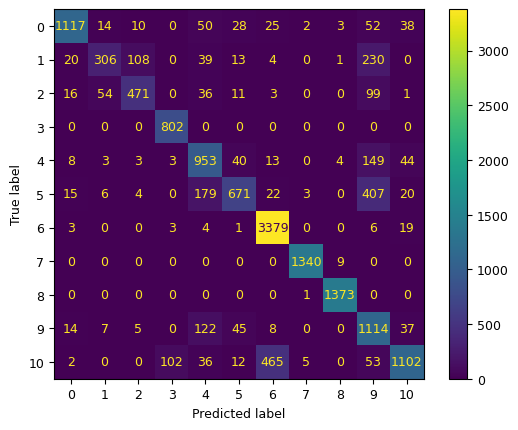

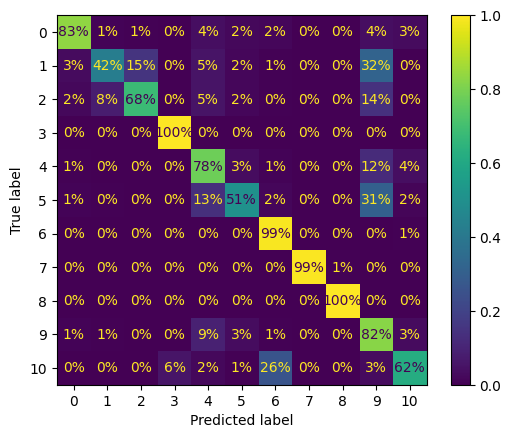

In [307]:
confusion_matrix_plot(y_train_combined, y_pred_ada_train)

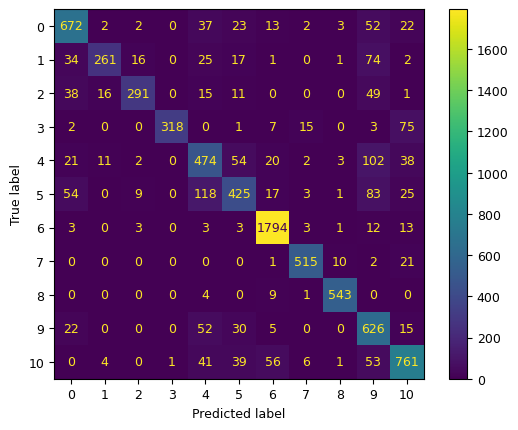

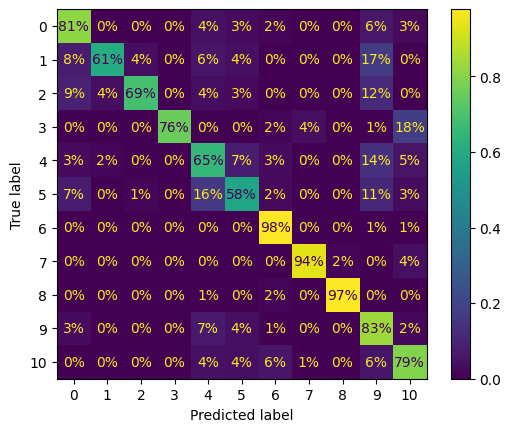

In [180]:
confusion_matrix_plot(y_test, y_pred_ada)

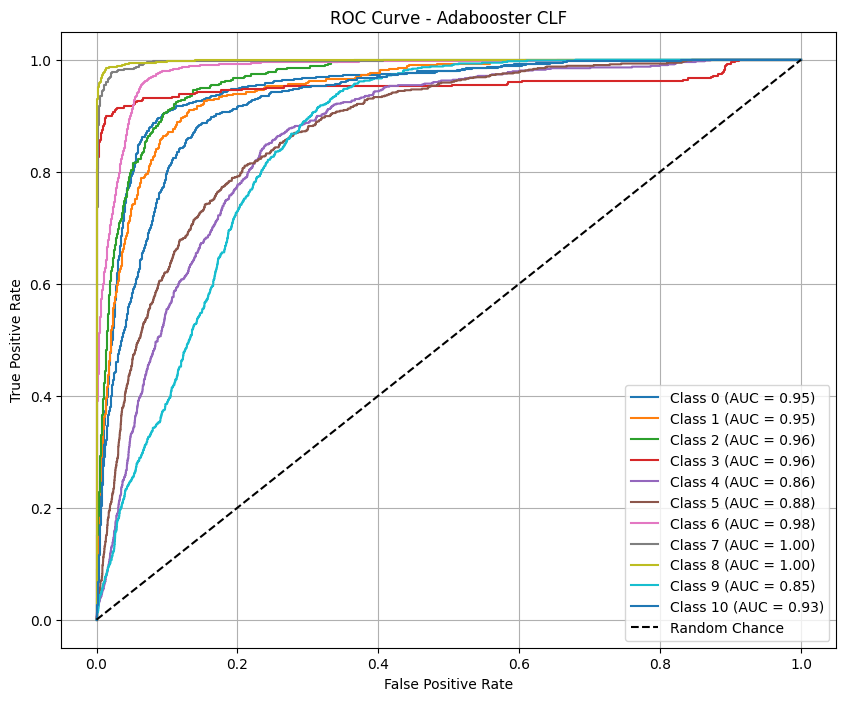

In [273]:
plot_roc_curve(y_test, ada_model.predict_proba(X_test_scaled), "Adabooster CLF")

## Bagging CLF

In [323]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=5), 
                            n_estimators=500,
                            max_samples=0.8, n_jobs=-1, random_state=42)

In [324]:
start_time = time.time()
bag_clf.fit(X_train_combined_sc, y_train_combined)
end_time = time.time()
time_bag_clf = end_time - start_time

In [325]:
time_bag_clf

1939.3277332782745

In [326]:
y_pred_bag_clf_train = bag_clf.predict(X_train_combined_sc)

In [327]:
evaluate_model(y_train_combined, y_pred_bag_clf_train, "Bag CLF train")

--- Bag CLF train ---
Confusion Matrix:
[[1124   11   38    0    1   13   35    6    9   60   42]
 [ 124  345  150    0    1   46    0    3    2   39   11]
 [ 129   15  445    0    0   22    1    0   13   66    0]
 [   0    0    0  740    0    3   24    6    5    6   18]
 [ 568    1    5   10   37   93   17    5   32  392   60]
 [ 331    6    9    0    6  773   19    7   12  138   26]
 [  97    1    5   21    2   12 2883    1    4  267  122]
 [   2    0    0    0    1    0    1 1254   82    1    8]
 [   7    0    0    0    0    2    4   48 1292    8   13]
 [ 312    5   14    2    2  482   17    0    0  497   21]
 [ 158    6    0   40    4  152  127   12   28   81 1169]]

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.84      0.54      1339
           1       0.88      0.48      0.62       721
           2       0.67      0.64      0.66       691
           3       0.91      0.92      0.92       802
           4       0.69   

In [328]:
y_pred_bag_clf = bag_clf.predict(X_test_scaled)

In [329]:
evaluate_model(y_test, y_pred_bag_clf, "Bag CLF")

--- Bag CLF ---
Confusion Matrix:
[[ 682    7   20    0    3   13   25    5   12   21   40]
 [ 104  155   68    0    1   36    2    9    7   42    7]
 [ 103   21  210    0    1   20    0    0   18   48    0]
 [   7    1    0  337    0    1   23   23    1    3   25]
 [ 398    2   10    1   18   58   22    7   21  180   10]
 [ 244   11    1    1    3  315   15   10   16  104   15]
 [  56    0    0   16    2   24 1387    1    7  195  147]
 [   3    0    0    0    1    0    9  476   50    0   10]
 [   6    0    0    1    1    0   11   32  494    0   12]
 [ 250    2   19    0    4  188    8    4    0  264   11]
 [ 106    1    1   32    1  134   74    7    7   45  554]]

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.82      0.49       828
           1       0.78      0.36      0.49       431
           2       0.64      0.50      0.56       421
           3       0.87      0.80      0.83       421
           4       0.51      0.0

In [330]:

bag_clf_2 = BaggingClassifier(
    DecisionTreeClassifier(
        max_depth=10,
        min_samples_split=5,
        random_state=42,
    ),
    n_estimators=500,
    max_samples=0.8,  # Use 80% of the dataset for each estimator
    n_jobs=-1,
    random_state=42,
)


In [331]:
start_time = time.time()
bag_clf_2.fit(X_train_combined_sc, y_train_combined)
end_time = time.time()
time_bag_clf_2 = end_time - start_time

In [333]:
time_bag_clf_2

2447.6849761009216

In [334]:
y_pred_bag_clf_2_train =  bag_clf_2.predict(X_train_combined_sc)

In [335]:
evaluate_model(y_train_combined, y_pred_bag_clf_2_train, "Bagging CLF Train")

--- Bagging CLF Train ---
Confusion Matrix:
[[1220    1    0    0   25   10    8    3    0   60   12]
 [  66  542    1    0   34   18    0    0    1   59    0]
 [  69    1  512    0   22    8    0    0    0   79    0]
 [   0    0    0  784    0    1    7    0    0    2    8]
 [  68    0    0    0  916   57    2    0    1  136   40]
 [  71    0    0    0   71 1052    9    0    1  112   11]
 [  24    0    0    0    9    0 3352    0    0   19   11]
 [   0    0    0    0    1    0    0 1342    5    1    0]
 [   1    0    0    0    0    0    0    0 1358   11    4]
 [  14    0    0    0   25   37    5    0    0 1249   22]
 [  20    0    0    0   20   42   28    0    0  107 1560]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84      1339
           1       1.00      0.75      0.86       721
           2       1.00      0.74      0.85       691
           3       1.00      0.98      0.99       802
           4       0.8

In [336]:
y_pred_bag_clf_2 =  bag_clf_2.predict(X_test_scaled)

In [337]:
evaluate_model(y_test, y_pred_bag_clf_2, "Bagging CLF")

--- Bagging CLF ---
Confusion Matrix:
[[ 690    4    0    0   24    7   19    5    0   38   41]
 [  68  237    9    0   11   18    2    2    2   80    2]
 [  64   18  231    0   27   11    0    0    0   70    0]
 [   6    0    1  348    0    0   16   18    1    1   30]
 [  96   12    3    0  388   70   20    9    4  106   19]
 [ 110    1    5    0   87  407   16   15    3   76   15]
 [  16    0    4    1   10    1 1682    1    2   24   94]
 [   2    0    0    0    1    0    7  527    3    2    7]
 [   2    2    0    0    1    0    3   24  521    0    4]
 [  70    5    5    0   55   43   11    3    0  543   15]
 [  15    5    0   14   31   71   59   10    7  102  648]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.83      0.70       828
           1       0.83      0.55      0.66       431
           2       0.90      0.55      0.68       421
           3       0.96      0.83      0.89       421
           4       0.61     

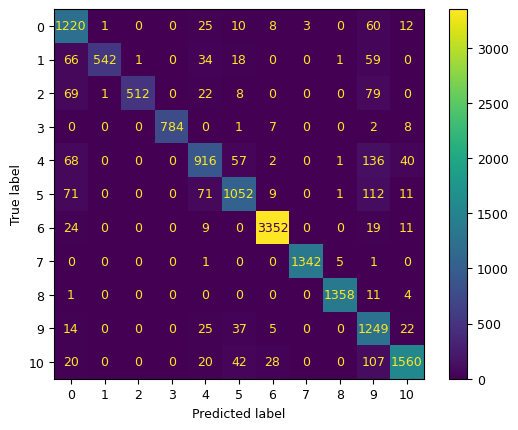

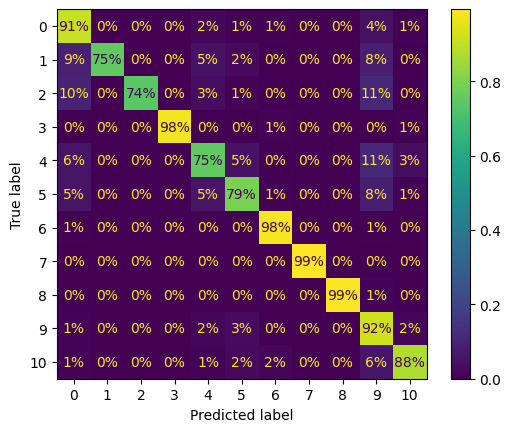

In [342]:
confusion_matrix_plot(y_train_combined, y_pred_bag_clf_2_train)

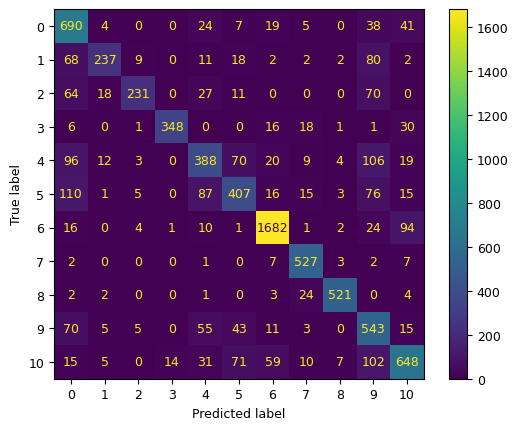

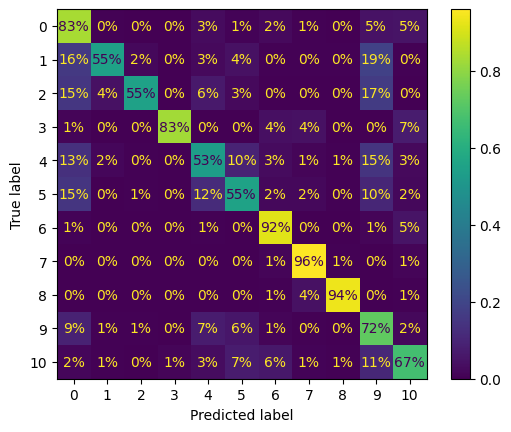

In [340]:
confusion_matrix_plot(y_test, y_pred_bag_clf_2)

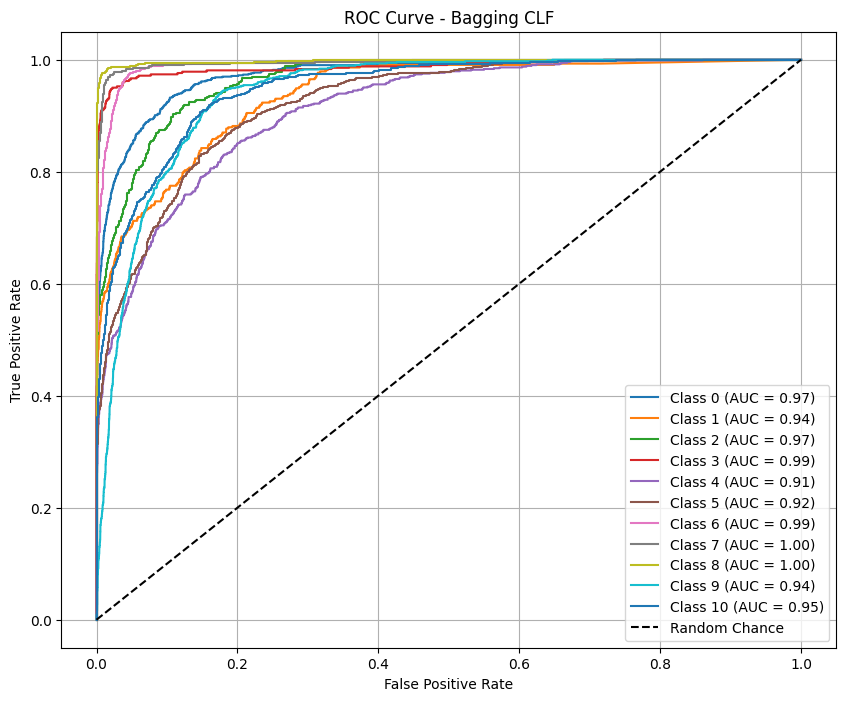

In [339]:
plot_roc_curve(y_test, bag_clf_2.predict_proba(X_test_scaled), "Bagging CLF")

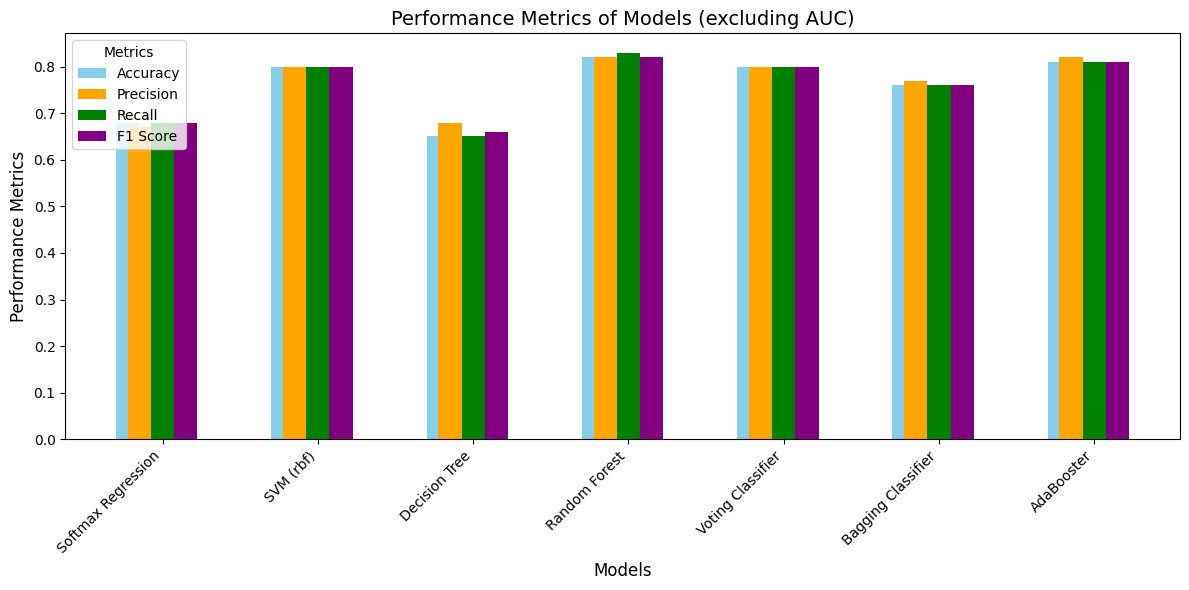

In [1]:
import pandas as pd

# Data for performance metrics
data = {
    "Model": [
        "Softmax Regression", "SVM (rbf)", "Decision Tree",
        "Random Forest", "Voting Classifier", "Bagging Classifier", "AdaBooster"
    ],
    "Accuracy": [0.68, 0.80, 0.65, 0.82, 0.80, 0.76, 0.81],
    "Precision": [0.67, 0.80, 0.68, 0.82, 0.80, 0.77, 0.82],
    "Recall": [0.68, 0.80, 0.65, 0.83, 0.80, 0.76, 0.81],
    "F1 Score": [0.68, 0.80, 0.66, 0.82, 0.80, 0.76, 0.81]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Set the position of the bars
x = np.arange(len(df["Model"]))  # the label locations
width = 0.15  # width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Adding bars for each metric (excluding AUC)
ax.bar(x - 1.5*width, df["Accuracy"], width, label='Accuracy', color='skyblue')
ax.bar(x - width, df["Precision"], width, label='Precision', color='orange')
ax.bar(x, df["Recall"], width, label='Recall', color='green')
ax.bar(x + width, df["F1 Score"], width, label='F1 Score', color='purple')

# Adding labels and title
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Performance Metrics', fontsize=12)
ax.set_title('Performance Metrics of Models (excluding AUC)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df["Model"], rotation=45, ha='right')
ax.legend(title="Metrics", loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


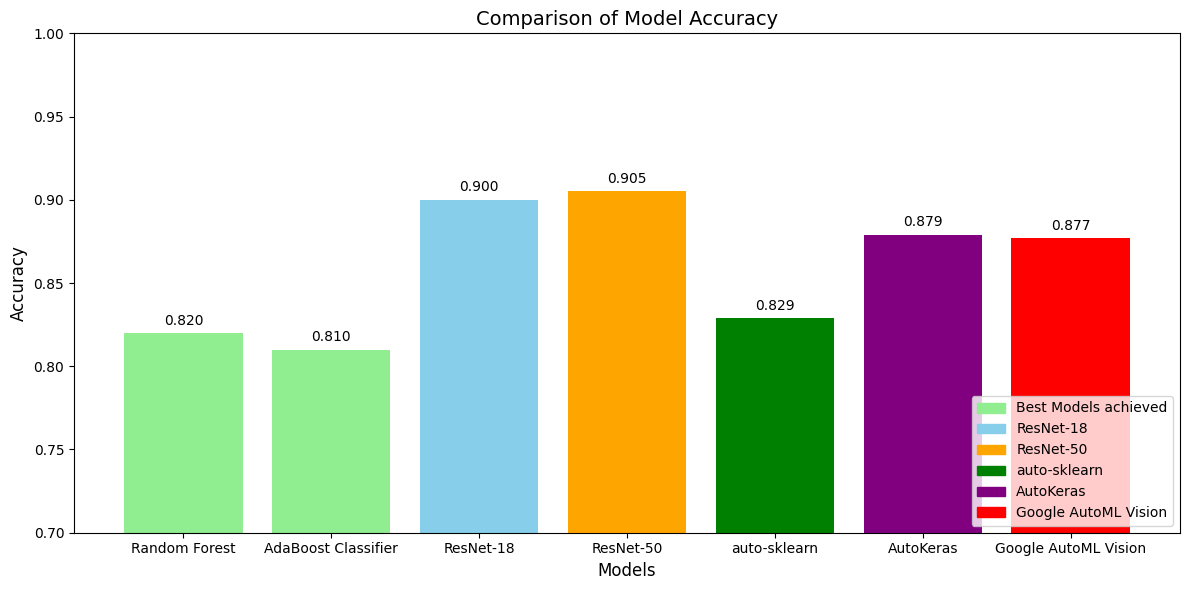

In [2]:
import matplotlib.pyplot as plt

# Data for models and their accuracy
models = [
    "Random Forest", 
    "AdaBoost Classifier", 
    "ResNet-18", 
    "ResNet-50", 
    "auto-sklearn", 
    "AutoKeras", 
    "Google AutoML Vision"
]
accuracy = [0.82, 0.81, 0.900, 0.905, 0.829, 0.879, 0.877]

# Highlight your models for comparison
colors = ['lightgreen', 'lightgreen', 'skyblue', 'orange', 'green', 'purple', 'red']

# Plotting the bar diagram
plt.figure(figsize=(12, 6))

# Bar plot
plt.bar(models, accuracy, color=colors)

# Adding labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Comparison of Model Accuracy', fontsize=14)
plt.ylim(0.7, 1.0)  # Adjust y-axis range for better visualization

# Adding value labels on top of each bar
for i, acc in enumerate(accuracy):
    plt.text(i, acc + 0.005, f'{acc:.3f}', ha='center', fontsize=10)

# Highlighting your models in the legend
plt.legend(
    handles=[
        plt.Rectangle((0, 0), 1, 1, color='lightgreen', label='Best Models achieved'),
        plt.Rectangle((0, 0), 1, 1, color='skyblue', label='ResNet-18'),
        plt.Rectangle((0, 0), 1, 1, color='orange', label='ResNet-50'),
        plt.Rectangle((0, 0), 1, 1, color='green', label='auto-sklearn'),
        plt.Rectangle((0, 0), 1, 1, color='purple', label='AutoKeras'),
        plt.Rectangle((0, 0), 1, 1, color='red', label='Google AutoML Vision'),
    ],
    loc='lower right', fontsize=10
)

# Displaying the plot
plt.tight_layout()
plt.show()
